In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
total = pd.read_csv('dados/AgrupamentoDesagregado-20240822093718-Limpo.csv')

In [22]:
pobreza = pd.read_csv('dados/indices_pobreza_consolidado.csv')

In [23]:
total.columns

Index(['Código do Município', 'Município', 'Estado', 'Região',
       'Ano de Referência', 'Código do Prestador', 'Prestador',
       'Sigla do Prestador', 'Abrangência', 'Tipo de serviço',
       'Natureza jurídica',
       'População total do município do ano de referência:',
       'População total atendida com esgotamento sanitário'],
      dtype='object')

In [24]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Código do Município                                 2362 non-null   int64 
 1   Município                                           2362 non-null   object
 2   Estado                                              2362 non-null   object
 3   Região                                              2362 non-null   object
 4   Ano de Referência                                   2362 non-null   int64 
 5   Código do Prestador                                 2362 non-null   int64 
 6   Prestador                                           2362 non-null   object
 7   Sigla do Prestador                                  2362 non-null   object
 8   Abrangência                                         2362 non-null   object
 9   Tipo de 

# Prestadores e separação de dados
Cada municipio tem pelo menos um prestador de serviço de saneamento, em alguns e necessario somar os dados de todos os prestadores para obter os dados do municipio.

In [25]:
total[total['Município']=='Rio de Janeiro']

,Código do Município,Município,Estado,Região,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,População total do município do ano de referência:,População total atendida com esgotamento sanitário
1301,330455,Rio de Janeiro,RJ,Sudeste,2022,33045500,Companhia Estadual de Águas e Esgotos,CEDAE,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,"6.211.223,00",0
1303,330455,Rio de Janeiro,RJ,Sudeste,2022,33045512,ÁGUAS DO RIO 1 SPE S.A.,RIO1,Microrregional,Água e Esgoto,Empresa privada,"6.211.223,00",844.604
1309,330455,Rio de Janeiro,RJ,Sudeste,2022,33045513,ÁGUAS DO RIO 4 SPE S.A.,RIO4,Microrregional,Água e Esgoto,Empresa privada,"6.211.223,00",2.922.773
1313,330455,Rio de Janeiro,RJ,Sudeste,2022,33045514,Iguá Rio de Janeiro S.A.,IGUARJ,Microrregional,Água e Esgoto,Empresa privada,"6.211.223,00",683.254


In [26]:
total.head()

,Código do Município,Município,Estado,Região,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,População total do município do ano de referência:,População total atendida com esgotamento sanitário
0,530010,Brasília,DF,Centro-Oeste,2022,53001000,Companhia de Saneamento Ambiental do Distrito ...,CAESB,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,"2.817.381,00",2.600.435
1,520010,Abadiânia,GO,Centro-Oeste,2022,52001011,Serviço Autônomo de Água e Esgoto,SAAE,Local,Água e Esgoto,Autarquia,"17.232,00",14.115
2,520390,Buriti Alegre,GO,Centro-Oeste,2022,52039011,BURITI ALEGRE AMBIENTAL S.P.E -S/A,BAA,Local,Água e Esgoto,Empresa privada,"10.495,00",1.492
3,520450,Caldas Novas,GO,Centro-Oeste,2022,52045011,Departamento Municipal de Água e Esgoto,DEMAE,Local,Água e Esgoto,Autarquia,"98.622,00",54.168
4,520510,Catalão,GO,Centro-Oeste,2022,52051011,Superintendência Municipal de Água e Esgoto,SAE,Local,Água e Esgoto,Autarquia,"114.427,00",72.439


In [27]:
print(total['População total do município do ano de referência:'].isnull().sum())
(total['População total do município do ano de referência:'] == '0,00').sum()

0


0

In [28]:
total['População total do município do ano de referência:'] = total['População total do município do ano de referência:'].str.replace(' ', '')
total['População total do município do ano de referência:'] = total['População total do município do ano de referência:'].str.replace('.', '')
total['População total do município do ano de referência:'] = total['População total do município do ano de referência:'].str.replace(',00', '')
total['População total do município do ano de referência:'] =  total['População total do município do ano de referência:'].astype(int)

In [29]:
total['População total atendida com esgotamento sanitário'] = total['População total atendida com esgotamento sanitário'].str.replace(' ', '')
total['População total atendida com esgotamento sanitário'] = total['População total atendida com esgotamento sanitário'].str.replace('.', '')
total['População total atendida com esgotamento sanitário'] = total['População total atendida com esgotamento sanitário'].str.replace(',00', '')


In [30]:
total['População total atendida com esgotamento sanitário'] = total['População total atendida com esgotamento sanitário'].fillna(0)
total['População total atendida com esgotamento sanitário'] = total['População total atendida com esgotamento sanitário'].astype(int)

In [31]:
total.isnull().sum()

Código do Município                                   0
Município                                             0
Estado                                                0
Região                                                0
Ano de Referência                                     0
Código do Prestador                                   0
Prestador                                             0
Sigla do Prestador                                    0
Abrangência                                           0
Tipo de serviço                                       0
Natureza jurídica                                     0
População total do município do ano de referência:    0
População total atendida com esgotamento sanitário    0
dtype: int64

In [32]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Código do Município                                 2362 non-null   int64 
 1   Município                                           2362 non-null   object
 2   Estado                                              2362 non-null   object
 3   Região                                              2362 non-null   object
 4   Ano de Referência                                   2362 non-null   int64 
 5   Código do Prestador                                 2362 non-null   int64 
 6   Prestador                                           2362 non-null   object
 7   Sigla do Prestador                                  2362 non-null   object
 8   Abrangência                                         2362 non-null   object
 9   Tipo de 

# Dados de 2022 

In [33]:
total_2022 = total[total['Ano de Referência'] == 2022]

In [34]:
total_2022 = total_2022.drop(columns=['Ano de Referência'])

In [35]:
total_2022['Porcentagem Abastecida por prestador'] = total_2022['População total atendida com esgotamento sanitário']/ total_2022['População total do município do ano de referência:'] 

In [36]:
total_2022['Porcentagem Abastecida por prestador']

0       0.922997
1       0.819116
2       0.142163
3       0.549249
4       0.633059
          ...   
2357    0.015902
2358    0.431210
2359    0.048210
2360    0.154883
2361    0.004219
Name: Porcentagem Abastecida por prestador, Length: 2362, dtype: float64

In [37]:
total_2022

,Código do Município,Município,Estado,Região,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,População total do município do ano de referência:,População total atendida com esgotamento sanitário,Porcentagem Abastecida por prestador
0,530010,Brasília,DF,Centro-Oeste,53001000,Companhia de Saneamento Ambiental do Distrito ...,CAESB,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,2817381,2600435,0.922997
1,520010,Abadiânia,GO,Centro-Oeste,52001011,Serviço Autônomo de Água e Esgoto,SAAE,Local,Água e Esgoto,Autarquia,17232,14115,0.819116
2,520390,Buriti Alegre,GO,Centro-Oeste,52039011,BURITI ALEGRE AMBIENTAL S.P.E -S/A,BAA,Local,Água e Esgoto,Empresa privada,10495,1492,0.142163
3,520450,Caldas Novas,GO,Centro-Oeste,52045011,Departamento Municipal de Água e Esgoto,DEMAE,Local,Água e Esgoto,Autarquia,98622,54168,0.549249
4,520510,Catalão,GO,Centro-Oeste,52051011,Superintendência Municipal de Água e Esgoto,SAE,Local,Água e Esgoto,Autarquia,114427,72439,0.633059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,421830,Três Barras,SC,Sul,42183011,Serviço Autônomo Municipal de Água e Saneament...,SAMASA,Local,Água e Esgoto,Autarquia,19746,314,0.015902
2358,421870,Tubarão,SC,Sul,42187012,Tubarão Saneamento S.A.,TBSSA,Local,Água e Esgoto,Empresa privada,110088,47471,0.431210
2359,421875,Tunápolis,SC,Sul,42187511,Prefeitura Municipal de Tunápolis,PMT,Local,Água e Esgoto,Administração pública direta,4916,237,0.048210
2360,421900,Urussanga,SC,Sul,42190011,Serviço Autônomo Municipal de Água e Esgoto,SAMAE,Local,Água e Esgoto,Autarquia,20919,3240,0.154883


### Plotando os graficos no mapa do Brasil

In [47]:
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [48]:
def geocode(city):
    try:
        location = geolocator.geocode(city+ ', Brazil')
        return location.latitude, location.longitude
    except:
        return None,None
    

In [49]:
total_2022['latitude'], total_2022['longitude'] = zip(*total_2022['Município'].apply(geocode))

In [52]:
total_2022.dropna(subset=['latitude', 'longitude'], inplace=True)

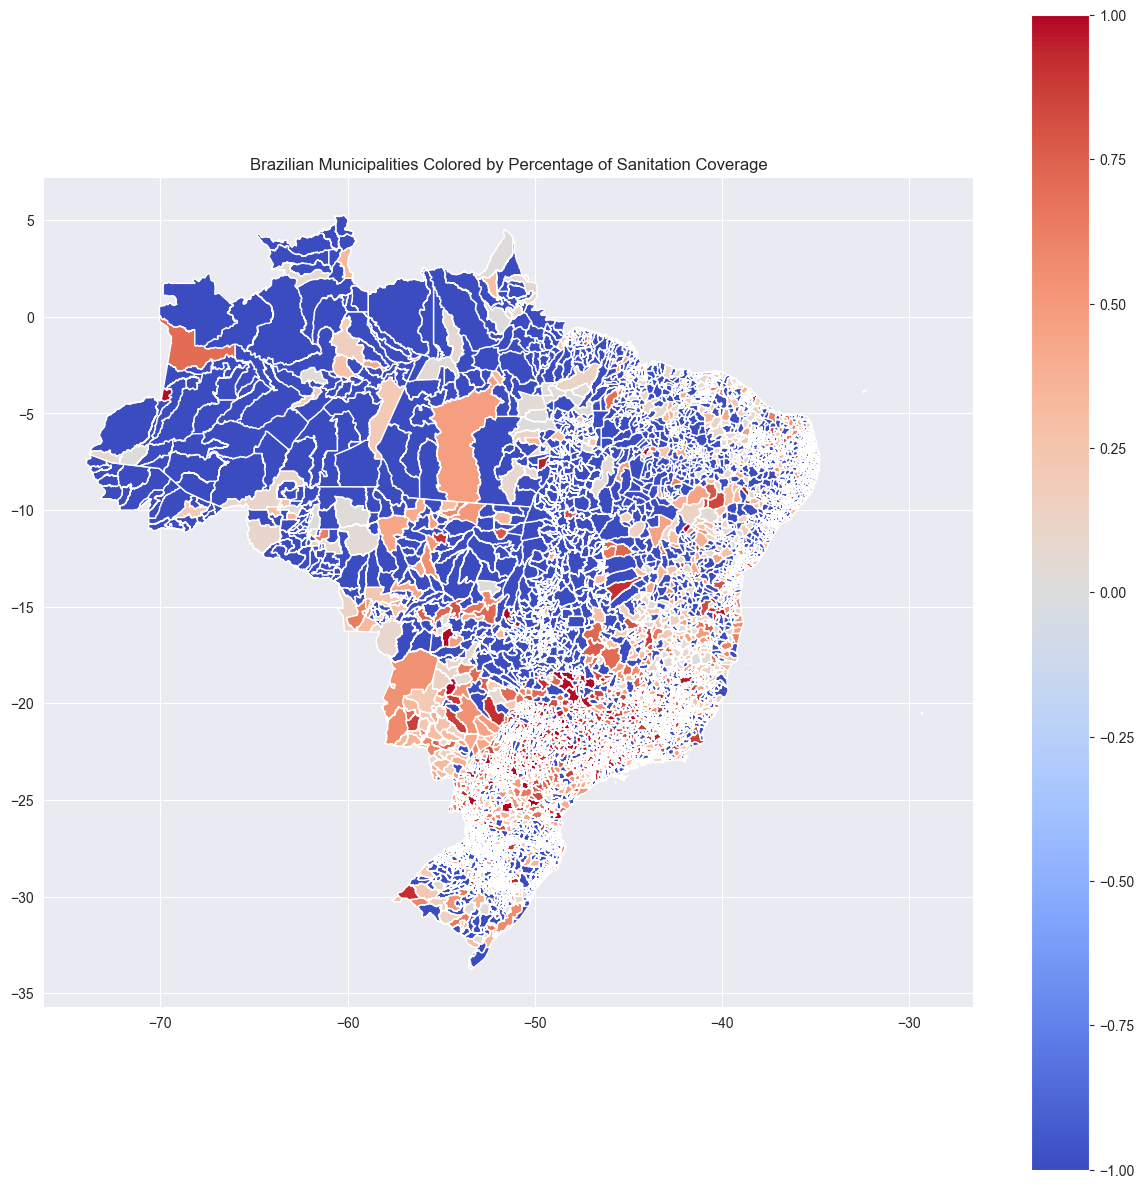

In [77]:
# Load the municipality shapefile
municipalities = gpd.read_file('dados/BR_Municipios_2021.shp')

# Ensure the 'Município' column in total_2022 matches the municipality names in the shapefile
total_2022['Município'] = total_2022['Município'].str.upper()
municipalities['NM_MUN'] = municipalities['NM_MUN'].str.upper()

# Merge the total_2022 DataFrame with the municipalities GeoDataFrame
merged = municipalities.merge(total_2022, left_on='NM_MUN', right_on='Município', how='left')

# Set 'Porcentagem Abastecida por prestador' to None for municipalities not in total_2022
merged['Porcentagem Abastecida por prestador'] = merged['Porcentagem Abastecida por prestador'].fillna(-1)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
merged.plot(ax=ax, column='Porcentagem Abastecida por prestador', cmap='coolwarm', legend=True, missing_kwds={'color': 'lightgrey'})

plt.title('Brazilian Municipalities Colored by Percentage of Sanitation Coverage')
plt.show()

## Dados da pobreza

In [39]:
pobreza.head()

,referencia,periodo,pobreza,extrema_pobreza,total,populacao_estimada,porcentagem_pobreza,porcentagem_extrema_pobreza,porcentagem_vulnerabilidade,familias_pobreza,...,familias_vulnerabilidade,indigenas_pobreza,indigenas_extrema_pobreza,indigenas_vulnerabilidade,quilombolas_pobreza,quilombolas_extrema_pobreza,quilombolas_vulnerabilidade,ciganos_pobreza,ciganos_extrema_pobreza,ciganos_vulnerabilidade
0,08/2012,201208,19370363,44381455,63751818,193976530,0.1,0.23,0.33,5265743,...,18162964,14144,86593,100737,7927,57407,65334,119,757,876
1,09/2012,201209,19371279,44554715,63925994,193976530,0.1,0.23,0.33,5278170,...,18284925,14157,87216,101373,8022,58018,66040,123,825,948
2,10/2012,201210,19376665,44652093,64028758,193976530,0.1,0.23,0.33,5288902,...,18365268,14171,87397,101568,8081,58468,66549,131,888,1019
3,11/2012,201211,19381040,44723215,64104255,193976530,0.1,0.23,0.33,5298295,...,18429654,14182,87697,101879,8198,59193,67391,142,925,1067
4,12/2012,201212,19392882,44684759,64077641,193976530,0.1,0.23,0.33,5311337,...,18472436,14209,87820,102029,8314,60250,68564,143,978,1121


In [40]:
pobreza['referencia']= pd.to_datetime(pobreza['referencia'],format = '%m/%Y')

In [41]:
pobreza['referencia']

0     2012-08-01
1     2012-09-01
2     2012-10-01
3     2012-11-01
4     2012-12-01
         ...    
117   2022-05-01
118   2022-06-01
119   2022-07-01
120   2022-08-01
121   2022-09-01
Name: referencia, Length: 122, dtype: datetime64[ns]